In [29]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [74]:
class RandomNormalRing:
    def __init__(self, size= 1024*1024, seed=None):
        G = np.random.default_rng(seed)
        self.ring = G.normal(size=size)
        self.ringIndex = 0
        self.ringSize = size
    
    def testInit(self):
        self.ring = np.arange(100)
        self.ringIndex = 0
        self.ringSize = self.ring.size
    
    def fill(self, A):
        li = 0
        for ri in range(self.ringSize - self.ringIndex, A.size, self.ringSize):
            A.flat[li:ri] = self.ring[self.ringIndex:]
#             print(li, ri, self.ringIndex)
            li = ri
            self.ringIndex = 0

        # The remaining chunk in A can now be filled from the ring
        ri = A.size - li
        ringIndexNew = self.ringIndex + ri
        A.flat[li:] = self.ring[self.ringIndex:ringIndexNew]
#         print("Final:",li, ri, self.ringIndex, ringIndexNew)
        self.ringIndex = ringIndexNew

In [93]:
# If the ring is significantly smaller than the image, the pattern is quite obvious
RR = RandomNormalRing(128*10)

In [4]:
A = np.zeros(shape=(1024,1024,4), dtype=float)

In [13]:
%time RR.fill(A)

CPU times: user 17.1 ms, sys: 0 ns, total: 17.1 ms
Wall time: 16.8 ms


In [6]:
G= np.random.default_rng()

In [7]:
%time A[...] = G.normal(size=A.shape)

CPU times: user 51.3 ms, sys: 0 ns, total: 51.3 ms
Wall time: 50.9 ms


------

In [92]:
ring = G.normal(size=1024*1024)

In [14]:
%%time
# Version without index variable, use roll once per call.
# =======
li = 0
ringSize = ring.size
for ri in range(ringSize, A.size, ringSize):
    A.flat[li:ri] = ring
    li = ri

ri = A.size - li
A.flat[li:] = ring[:ri]
ring = np.roll(ring, -ri)


CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 18.1 ms


In [76]:
A = np.zeros(shape=(128,128), dtype=float)

In [49]:
RR.testInit()

In [94]:
RR.fill(A)

<IPython.core.display.Javascript object>


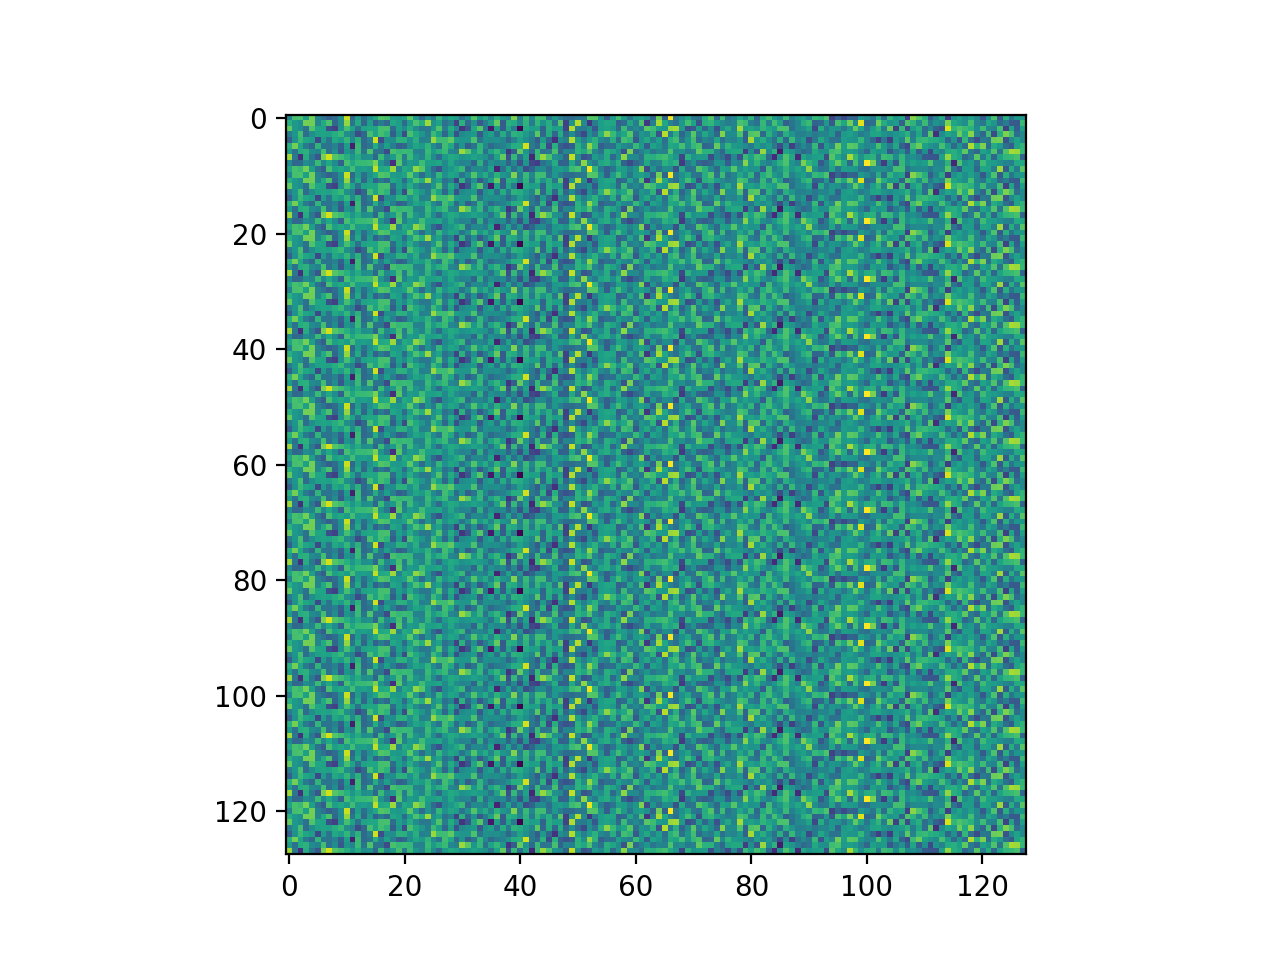

In [95]:
fig, ax = plt.subplots()
ax.imshow(A,interpolation='none')

In [45]:
print(RR.ringIndex)

32768
